# KMeans clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
dataIris = load_iris()
df = pd.DataFrame(
    dataIris['data'],
    columns = ['SL', 'SW', 'PL','PW']
)
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(
    lambda row: dataIris['target_names'][row]
)
df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 1. model KMeans

In [6]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters = len(dataIris.target_names)
)
model.fit(df[['PL','PW']], df['target'])
df['pred'] = model.predict(df[['PL','PW']])
df

,SL,SW,PL,PW,target,spesies,pred
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
5,5.4,3.9,1.7,0.4,0,setosa,0
6,4.6,3.4,1.4,0.3,0,setosa,0
7,5.0,3.4,1.5,0.2,0,setosa,0
8,4.4,2.9,1.4,0.2,0,setosa,0
9,4.9,3.1,1.5,0.1,0,setosa,0


### 2. centroid

In [8]:
centroidP = model.cluster_centers_
centroidP

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

### 3. plotting

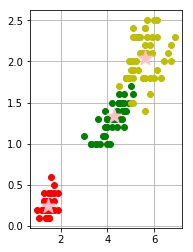

In [16]:
# data asli PL vs PW
plt.subplot(121)
plt.plot(
    df[df['target'] == 0]['PL'],
    df[df['target'] == 0]['PW'],
    'ro'  
)
plt.plot(
    df[df['target'] == 1]['PL'],
    df[df['target'] == 1]['PW'],
    'go'  
)
plt.plot(
    df[df['target'] == 2]['PL'],
    df[df['target'] == 2]['PW'],
    'yo'  
)

# centroid
plt.scatter(
    centroidP[:,0],
    centroidP[:,1],
    marker = '*',
    color = 'pink',
    s = 250,
    zorder = 4
)
plt.grid(True)
plt.show()

### 4. find best k value

In [18]:
#k kmeans => some square error(sse) + elbow methods

#1. cek sse nya
sse = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(df[['PL','PW']])
    sse.append(model.inertia_)

sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.03633387775173,
 9.215301022648848,
 7.679235060690944,
 6.576538396386223,
 5.528148730354612]

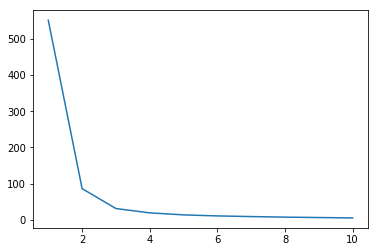

In [20]:
#2. elbow methods
plt.plot(range(1,11), sse)
plt.show()

In [ ]:
#hasilnya dilihat di posisi elbow = sekitar 3